<a href="https://colab.research.google.com/github/tuetkwanwing/Airbnb_EDA/blob/main/DS_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import csv
import numpy as np
import sklearn
import seaborn as sns

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, HalvingRandomSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, mean_squared_error, r2_score, balanced_accuracy_score, classification_report, ConfusionMatrixDisplay, precision_recall_curve, f1_score, auc
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, scale, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/ds701-fall-2023-midterm/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ds701-fall-2023-midterm/test.csv')

# New Section

In [ ]:
train['detailed_industry_recode'] = train['detailed_industry_recode'].astype('category')
train['detailed_occupation_recode'] = train['detailed_occupation_recode'].astype('category')
train['own_business_or_self_employed'] =  train['own_business_or_self_employed'].astype('category')
train['veterans_benefits'] = train['veterans_benefits'].astype('category')

In [ ]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].astype('category')


In [ ]:

le = LabelEncoder()

df_X = train.drop(["label"],axis=1) # separate X ...
df_y = le.fit_transform(train["label"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = .2, random_state=0) #split all
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80914, 40), (20229, 40), (80914,), (20229,))

In [ ]:
from sklearn.metrics import f1_score
def f1_scoring(y_true, y_pred):
  f_score = f1_score(y_true, y_pred)
  return f_score

In [ ]:
lgbmc=LGBMClassifier()

lgbmc.fit(X_train, y_train,categorical_feature = 'auto',eval_set=(X_test, y_test),feature_name='auto')

[LightGBM] [Info] Number of positive: 8927, number of negative: 71987
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 80914, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110327 -> initscore=-2.087405
[LightGBM] [Info] Start training from score -2.087405


LGBMClassifier()

<ipython-input-29-e08aa91452ac>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


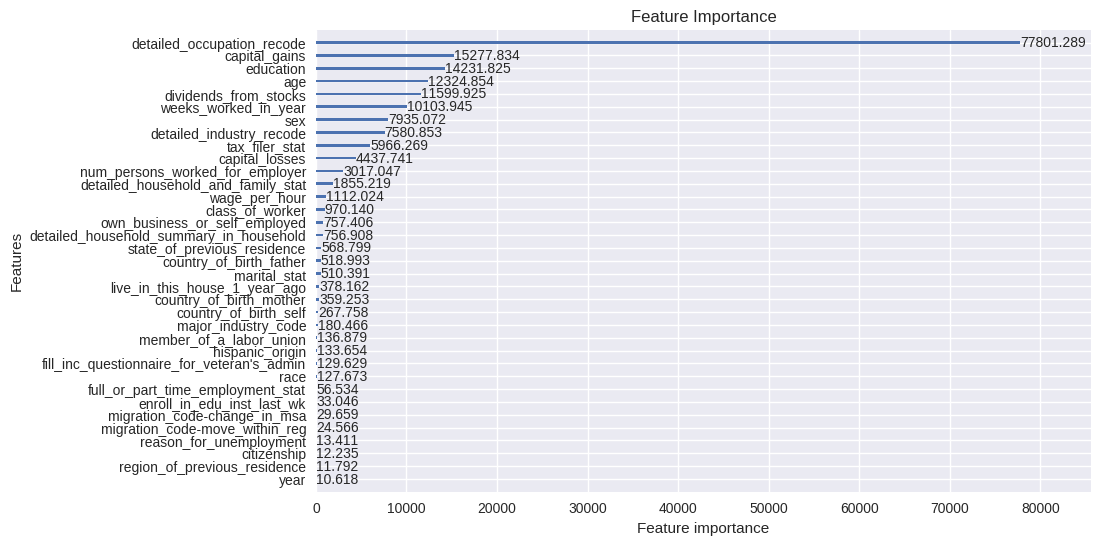

In [ ]:
import lightgbm as lgb
plt.style.use('seaborn')
lgb.plot_importance(lgbmc, figsize=(10, 6), max_num_features=40,importance_type = 'gain')  # You can adjust max_num_features as needed
plt.title("Feature Importance")
plt.show()

In [ ]:
train.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,...,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,label
0,56,Not in universe,0,0,Bachelors degree(BA AB BS),0,Not in universe,Divorced,Not in universe or children,Not in universe,...,?,United-States,United-States,Native- Born in the United States,0,Not in universe,2,1,95,1
1,53,Local government,43,2,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Divorced,Education,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,1
2,47,Private,35,33,Associates degree-academic program,0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,0
3,71,Not in universe,0,0,9th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
4,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101143 entries, 0 to 101142
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   age                                         101143 non-null  int64   
 1   class_of_worker                             101143 non-null  object  
 2   detailed_industry_recode                    101143 non-null  category
 3   detailed_occupation_recode                  101143 non-null  category
 4   education                                   101143 non-null  object  
 5   wage_per_hour                               101143 non-null  int64   
 6   enroll_in_edu_inst_last_wk                  101143 non-null  object  
 7   marital_stat                                101143 non-null  object  
 8   major_industry_code                         101143 non-null  object  
 9   major_occupation_code                       101143 non-null

In [ ]:
train.nunique()

age                                             91
class_of_worker                                  9
detailed_industry_recode                        52
detailed_occupation_recode                      47
education                                       17
wage_per_hour                                  898
enroll_in_edu_inst_last_wk                       3
marital_stat                                     7
major_industry_code                             24
major_occupation_code                           15
race                                             5
hispanic_origin                                 10
sex                                              2
member_of_a_labor_union                          3
reason_for_unemployment                          6
full_or_part_time_employment_stat                8
capital_gains                                  129
capital_losses                                 110
dividends_from_stocks                         1170
tax_filer_stat                 

In [ ]:
train['detailed_industry_recode'] = train['detailed_industry_recode'].astype('category')
train['detailed_occupation_recode'] = train['detailed_occupation_recode'].astype('category')
train['own_business_or_self_employed'] =  train['own_business_or_self_employed'].astype('category')
train['veterans_benefits'] = train['veterans_benefits'].astype('category')
#train['label'] = train['label'].astype('category')

#### Unique Categorical Value

In [ ]:
categorical_columns = train.select_dtypes(include=['category','object']).columns.tolist()

for categorical_column in categorical_columns:

  print(str(categorical_column))
  print('number of unique value for this feature: ' + str(train[categorical_column].nunique()))
  print(train[categorical_column].unique())


class_of_worker
number of unique value for this feature: 9
[' Not in universe' ' Local government' ' Private'
 ' Self-employed-not incorporated' ' State government'
 ' Self-employed-incorporated' ' Federal government' ' Without pay'
 ' Never worked']
detailed_industry_recode
number of unique value for this feature: 52
[0, 43, 35, 30, 42, ..., 51, 17, 46, 20, 10]
Length: 52
Categories (52, int64): [0, 1, 2, 3, ..., 48, 49, 50, 51]
detailed_occupation_recode
number of unique value for this feature: 47
[0, 2, 33, 37, 31, ..., 6, 27, 40, 45, 46]
Length: 47
Categories (47, int64): [0, 1, 2, 3, ..., 43, 44, 45, 46]
education
number of unique value for this feature: 17
[' Bachelors degree(BA AB BS)' ' Masters degree(MA MS MEng MEd MSW MBA)'
 ' Associates degree-academic program' ' 9th grade' ' Children'
 ' Some college but no degree' ' 1st 2nd 3rd or 4th grade'
 ' High school graduate' ' 12th grade no diploma' ' 11th grade'
 ' 7th and 8th grade' ' Associates degree-occup /vocational' ' 10th g

Here we could see that a lot of the categorical columns have quite some unique features, which could be an issue for model performance; for example, it would be inefficient to one-hot encoded these categorical values.

So we need to think about how to deal with it.

#### correlation matrix and heatmap

<ipython-input-7-ab94f92ed69f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_matrix = train.corr()


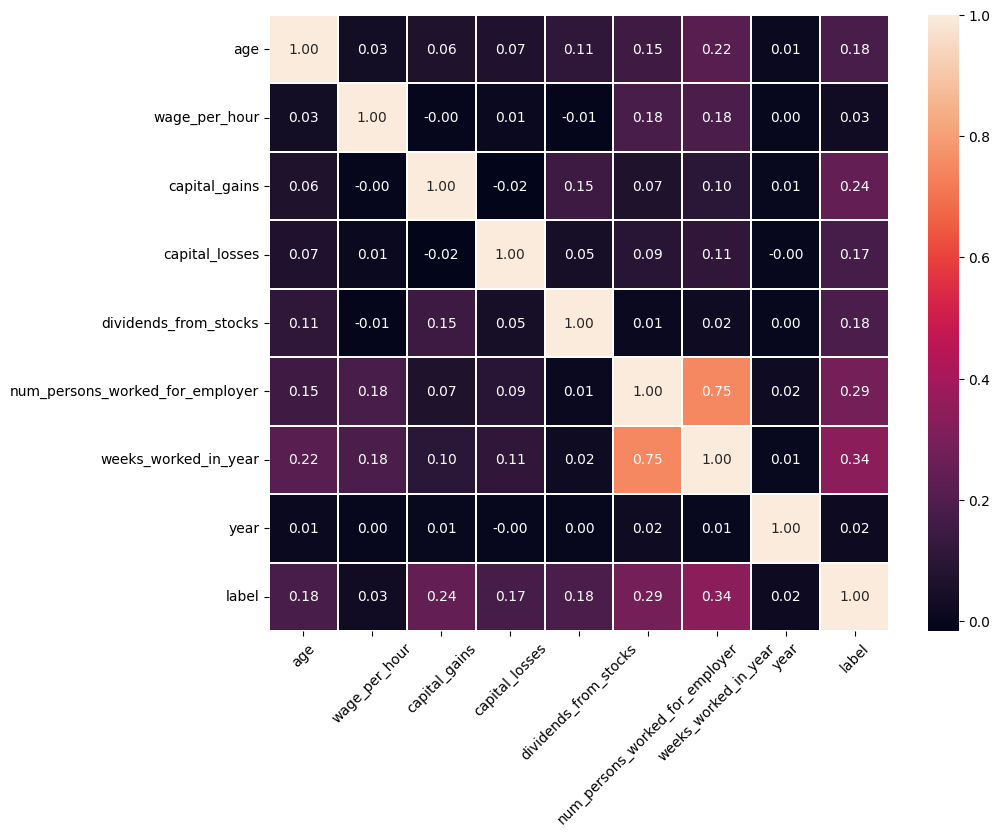

In [ ]:
data_matrix = train.corr()
plt.figure(figsize=(10,8))  # set plot figure size
sns.heatmap(data_matrix,annot=True,fmt=".2f",linewidth=.2)
plt.xticks(rotation=45);

Before changing 'label' type from int64 to categorical, a heatmap is drawn by looking at the correlation between other numerical features and label;
The graph suggests there is almost 0 correlation between year and label, also between wage_per_hour and label.

In [ ]:
train.groupby('label').agg(['mean']).transpose()

<ipython-input-21-9b2ec458f33a>:1: FutureWarning: ['class_of_worker', 'education', 'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code', 'major_occupation_code', 'race', 'hispanic_origin', 'sex', 'member_of_a_labor_union', 'reason_for_unemployment', 'full_or_part_time_employment_stat', 'tax_filer_stat', 'region_of_previous_residence', 'state_of_previous_residence', 'detailed_household_and_family_stat', 'detailed_household_summary_in_household', 'migration_code-change_in_msa', 'migration_code-change_in_reg', 'migration_code-move_within_reg', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'family_members_under_18', 'country_of_birth_father', 'country_of_birth_mother', 'country_of_birth_self', 'citizenship', 'own_business_or_self_employed', "fill_inc_questionnaire_for_veteran's_admin", 'veterans_benefits'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  t

,label,0,1
age,mean,33.632618,46.319275
detailed_industry_recode,mean,14.417905,29.155061
detailed_occupation_recode,mean,11.241269,12.072864
wage_per_hour,mean,53.621651,79.684853
capital_gains,mean,140.823087,4856.803392
capital_losses,mean,27.360993,193.025036
dividends_from_stocks,mean,105.742953,1579.767408
num_persons_worked_for_employer,mean,1.818409,4.003589
weeks_worked_in_year,mean,21.510872,48.024677
year,mean,94.498094,94.528715


In [ ]:
train['label'].value_counts()

0    89999
1    11144
Name: label, dtype: int64

####histogram of numerical

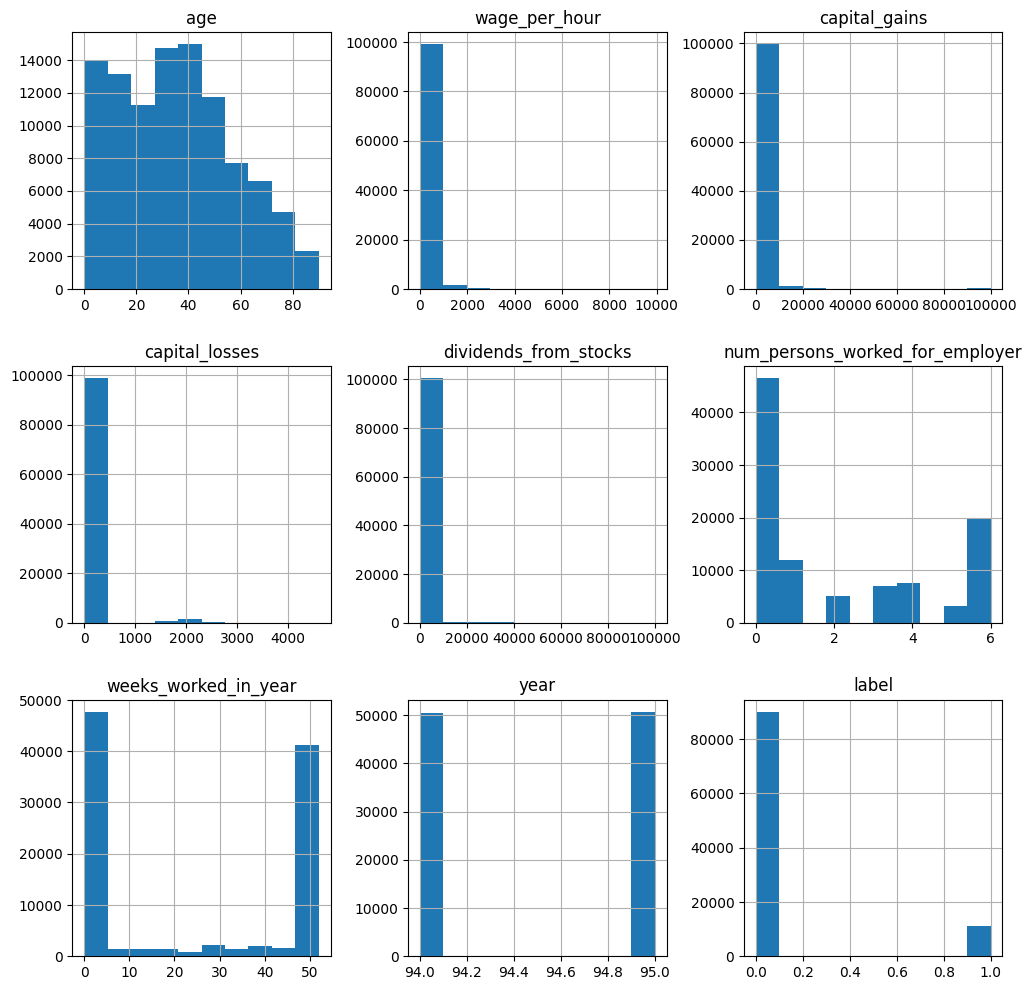

In [ ]:
train.drop(columns=['detailed_industry_recode','detailed_occupation_recode']).hist(figsize=(12,12));

'age' is not normally distributed;
'year' column as only two values (94 and 95).
 Considered to be dropped on 'model building' section;
all other columns have huge outlier values.

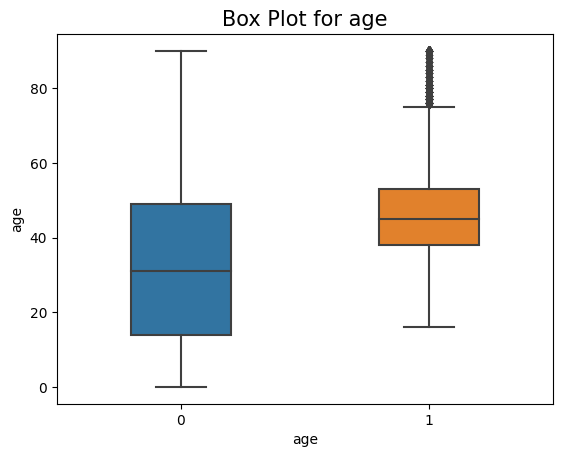

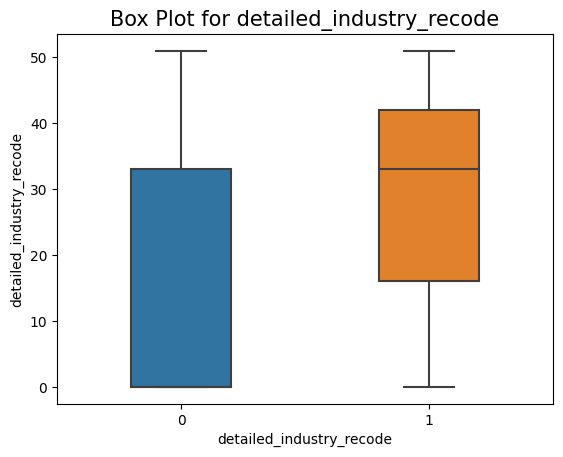

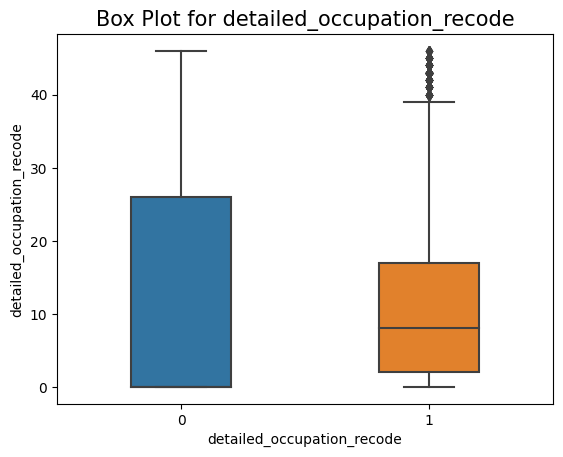

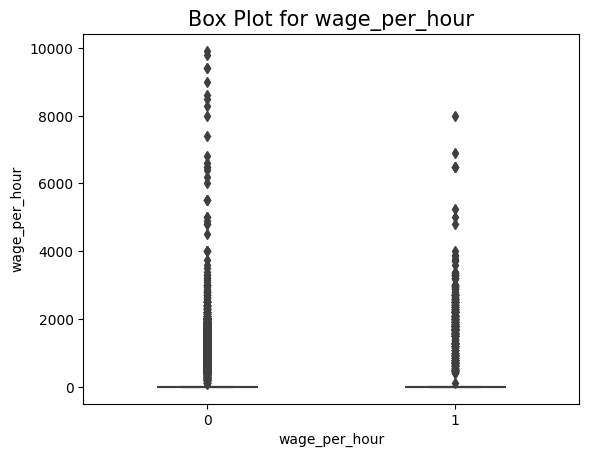

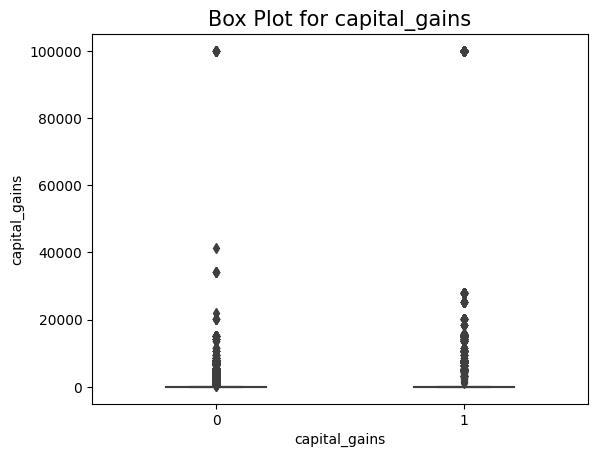

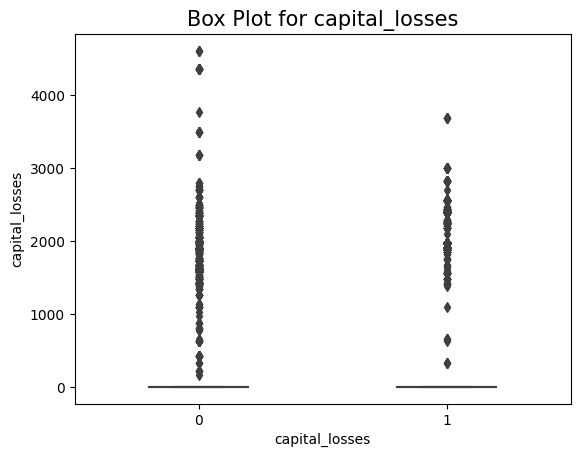

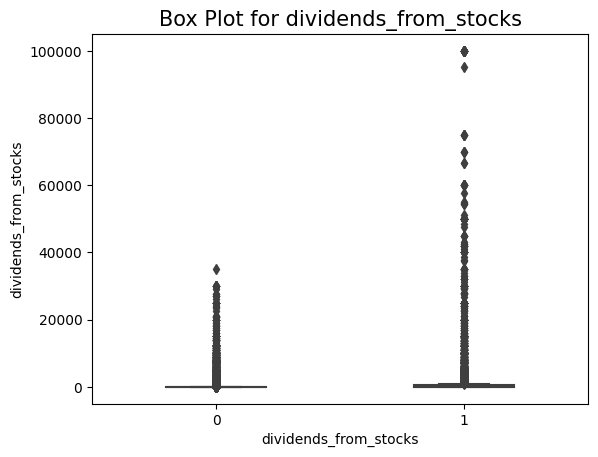

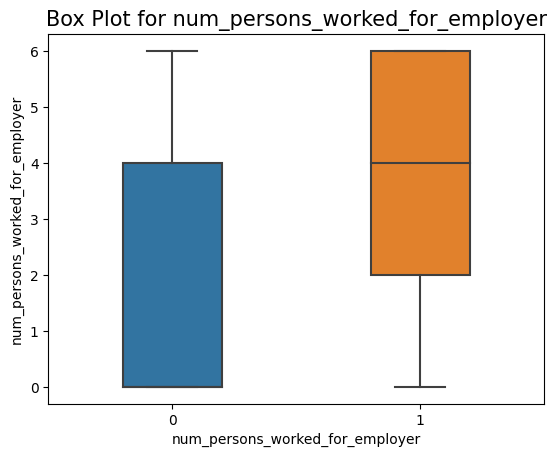

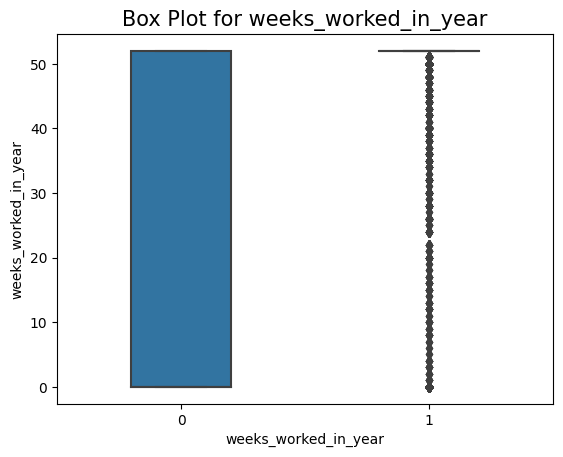

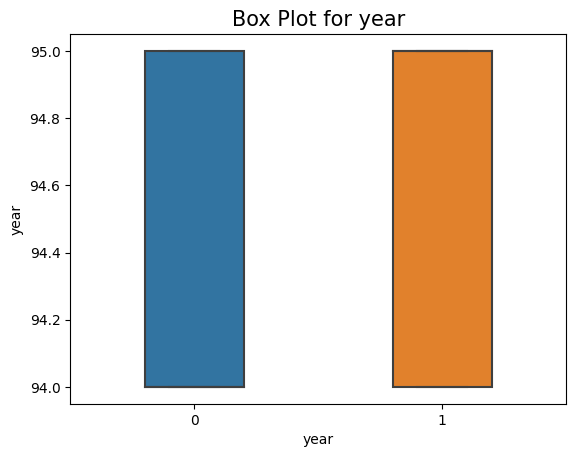

In [ ]:
numeric_features = train.select_dtypes(include=['int64']).columns

for feature in numeric_features:
    sns.boxplot(y=feature, x='label', data=train, width=0.4)
    plt.xlabel(feature)
    plt.title(f'Box Plot for {feature}', fontsize=15)
    plt.show()

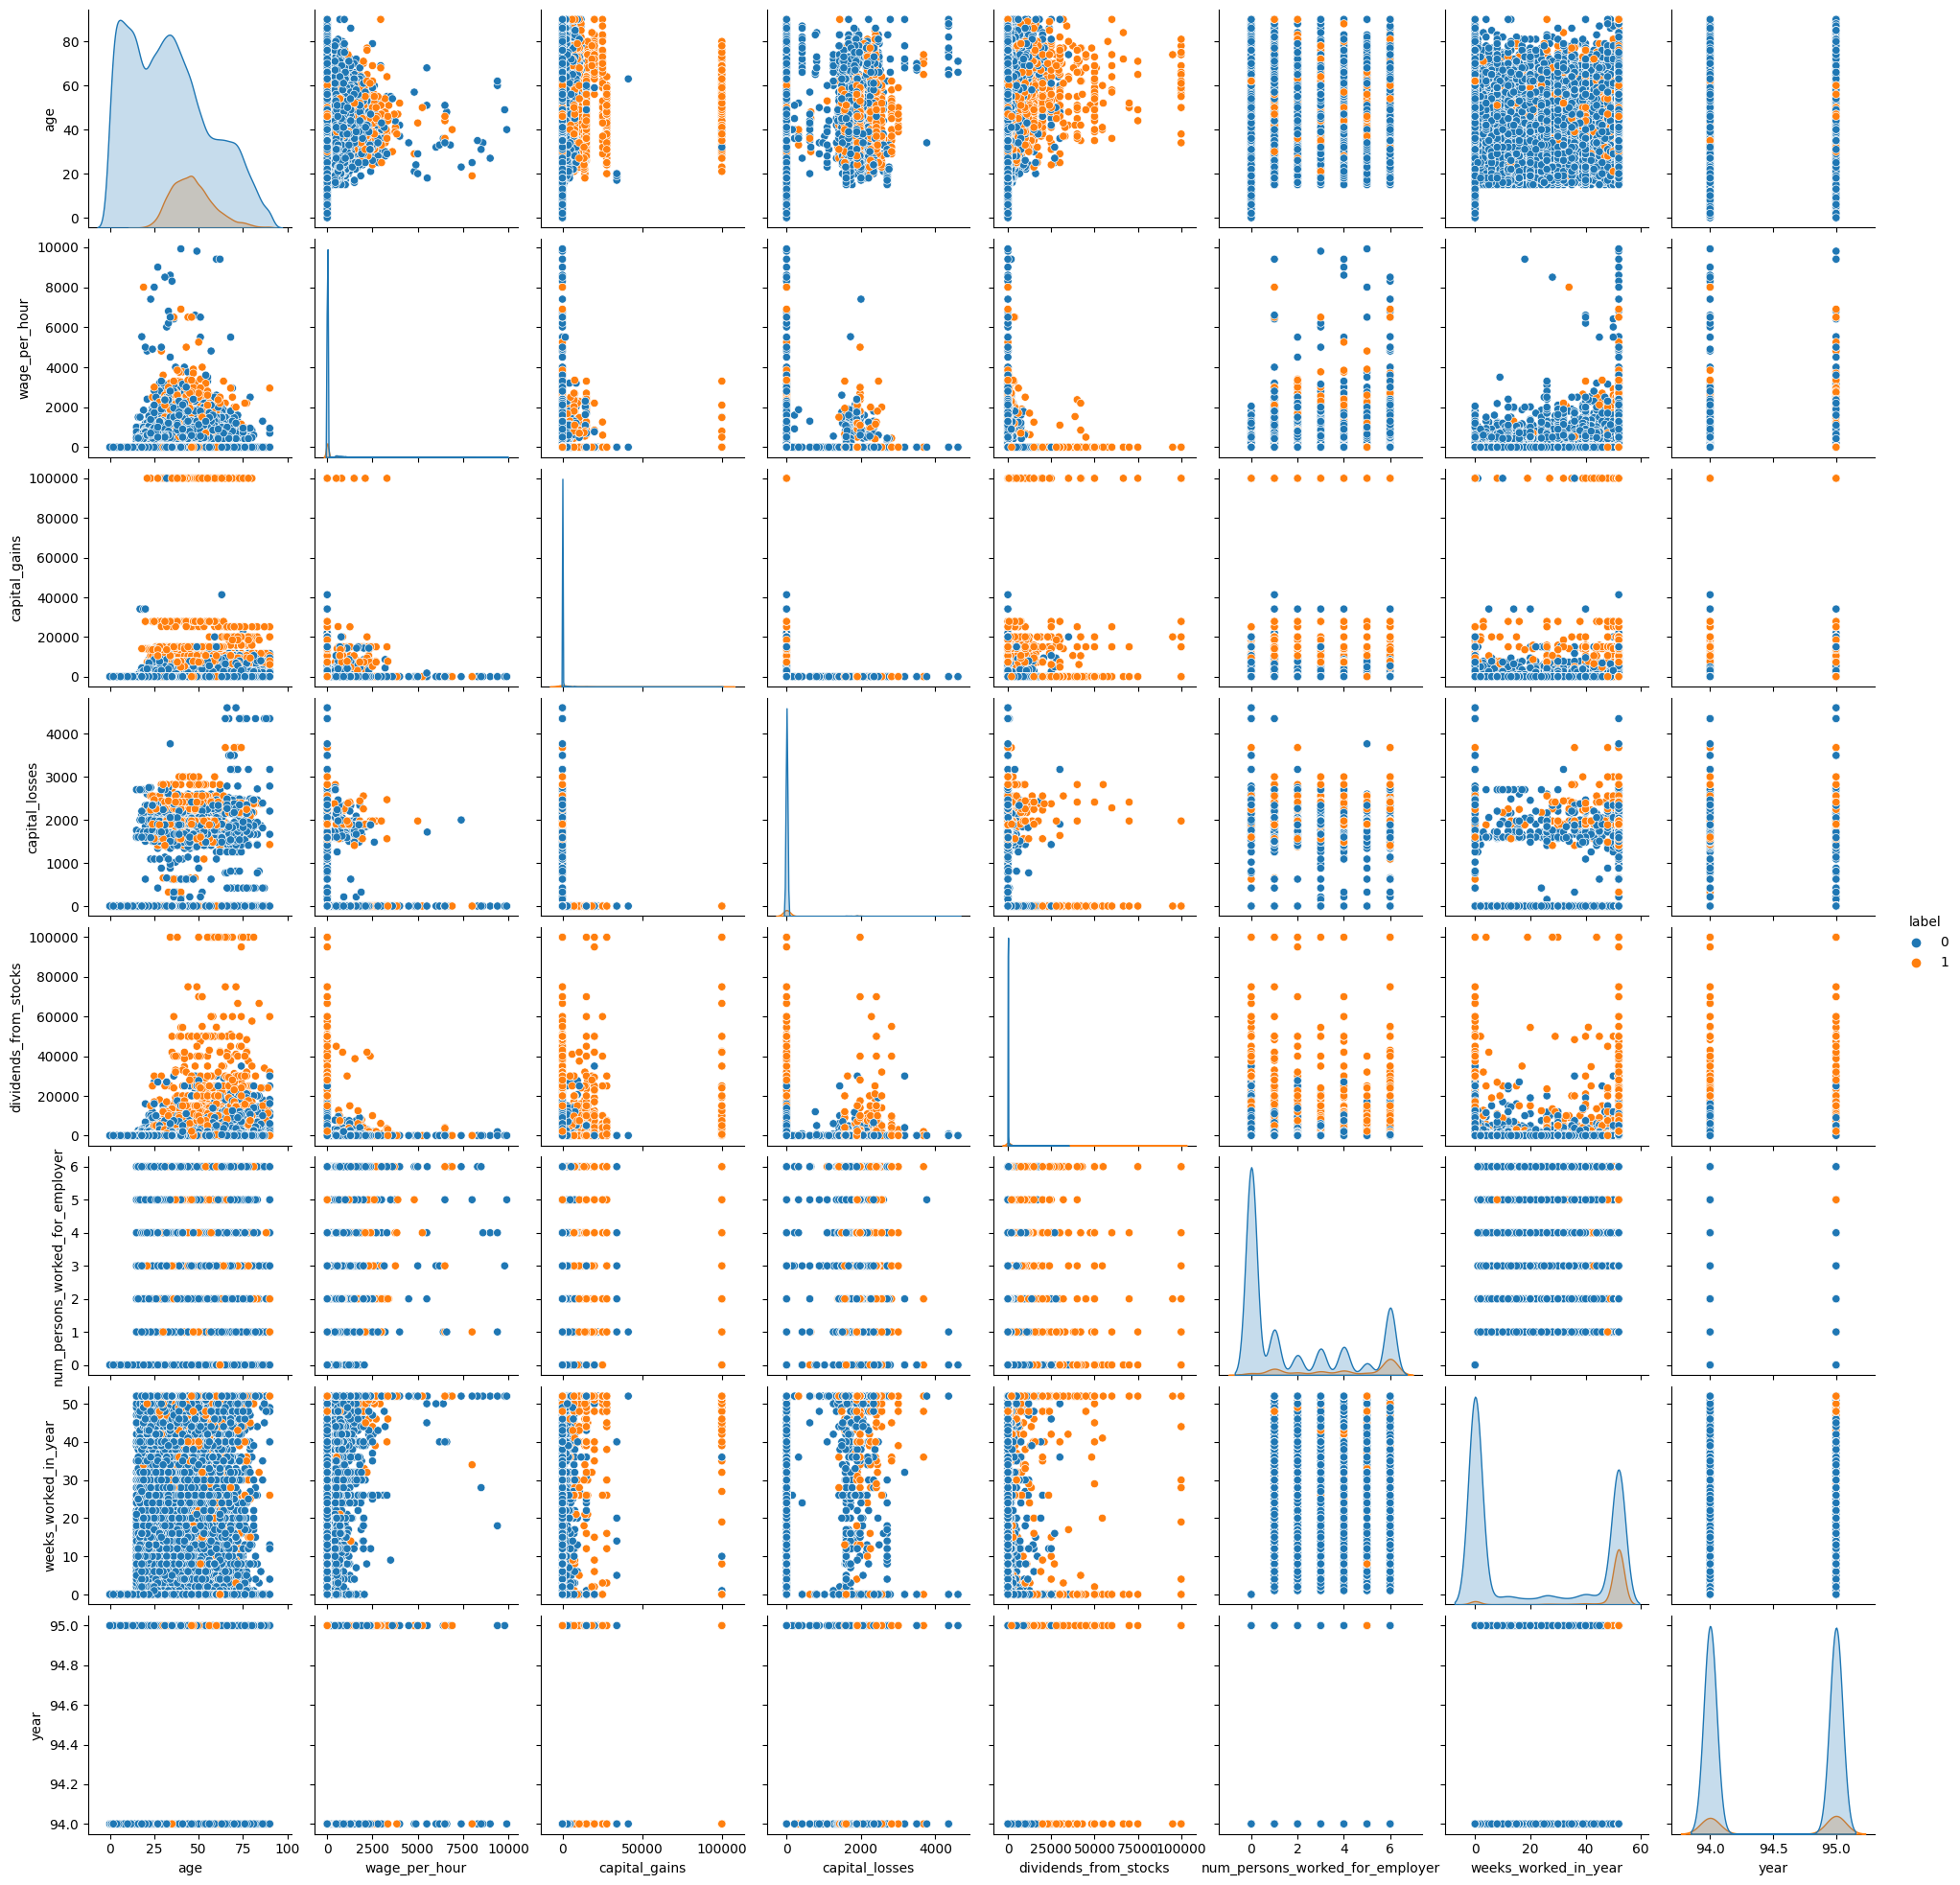

In [ ]:
sns.pairplot(train, hue='label')

In [ ]:
list_columns = train.select_dtypes(include=['int64']).columns.to_list()

In [ ]:
list_columns.extend(['detailed_industry_recode', 'detailed_occupation_recode'])

In [ ]:
df_columns

['age',
 'wage_per_hour',
 'capital_gains',
 'capital_losses',
 'dividends_from_stocks',
 'num_persons_worked_for_employer',
 'weeks_worked_in_year',
 'year',
 'detailed_industry_recode',
 'detailed_occupation_recode']

In [ ]:
train[list_columns].groupby(['detailed_industry_recode']).agg(['mean'])

<ipython-input-57-92db6c9ccda9>:1: FutureWarning: ['detailed_occupation_recode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  train[list_columns].groupby(['detailed_industry_recode']).agg(['mean'])


,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,year
,mean,mean,mean,mean,mean,mean,mean,mean
detailed_industry_recode,,,,,,,,
0,30.600909,0.000000,144.094257,14.450139,233.060873,0.300557,1.980084,94.500512
1,34.664251,71.400966,436.217391,67.437198,292.944444,1.978261,41.103865,94.557971
2,44.063604,20.806537,666.477915,67.125442,189.953180,1.452297,42.544170,94.518551
3,41.071006,182.710059,2013.715976,133.650888,312.008876,4.473373,47.325444,94.476331
4,38.656556,130.601761,762.130789,73.761579,198.786367,2.458252,43.723092,94.503588
5,36.985560,79.357401,946.270758,94.368231,102.516245,3.281588,45.902527,94.559567
6,37.370504,137.169065,559.805755,61.046763,114.392086,3.946043,46.039568,94.482014
7,41.960699,152.838428,404.820961,82.746725,174.816594,3.956332,47.043668,94.537118


In [ ]:
train[list_columns].groupby(['detailed_industry_recode']).max()

<ipython-input-58-91c99ddb96e0>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  train[list_columns].groupby(['detailed_industry_recode']).max()


,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,num_persons_worked_for_employer,weeks_worked_in_year,year
detailed_industry_recode,,,,,,,,
0,90,0,99999,4608,99999,6,52,95
1,78,1850,99999,2704,99999,6,52,95
2,90,3000,99999,2597,50000,6,52,95
3,90,3400,99999,3004,20970,6,52,95
4,90,6500,99999,3004,99999,6,52,95
5,86,1300,99999,2444,9000,6,52,95
6,79,1700,99999,2392,11000,6,52,95
7,67,4000,15024,3004,7000,6,52,95
8,90,3300,99999,2129,30000,6,52,95


#### education

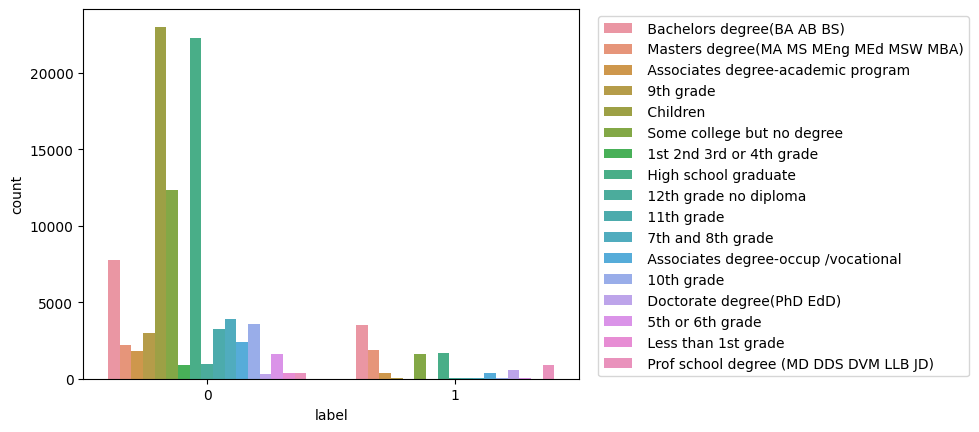

In [ ]:
train['label'] = train['label'].astype('category')
sns.countplot(x = 'label', hue = 'education', data = train)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))

In [ ]:
#Combining the lower grades of education together
train['education'].replace([' 9th grade', ' Children', ' 1st 2nd 3rd or 4th grade',
                         ' 12th grade no diploma', ' 11th grade', ' 7th and 8th grade', ' 10th grade', ' 5th or 6th grade',
                         ' Less than 1st grade'],
                             ' 12th_and_below', inplace = True)

In [ ]:
train['education'].value_counts()

 12th_and_below                            40813
 High school graduate                      23981
 Some college but no degree                13960
 Bachelors degree(BA AB BS)                11255
 Masters degree(MA MS MEng MEd MSW MBA)     4051
 Associates degree-occup /vocational        2732
 Associates degree-academic program         2204
 Prof school degree (MD DDS DVM LLB JD)     1265
 Doctorate degree(PhD EdD)                   882
Name: education, dtype: int64

#### reason for unempl

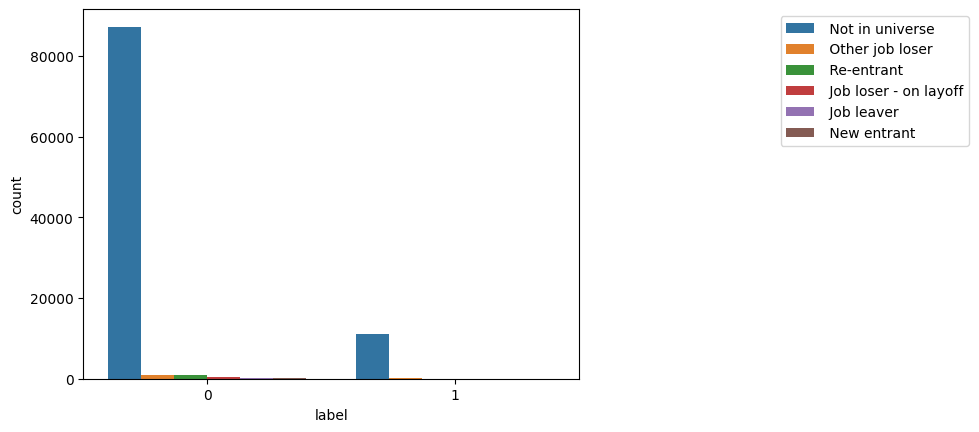

In [ ]:
train['label'] = train['label'].astype('category')
sns.countplot(x = 'label', hue ='reason_for_unemployment', data = train)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))

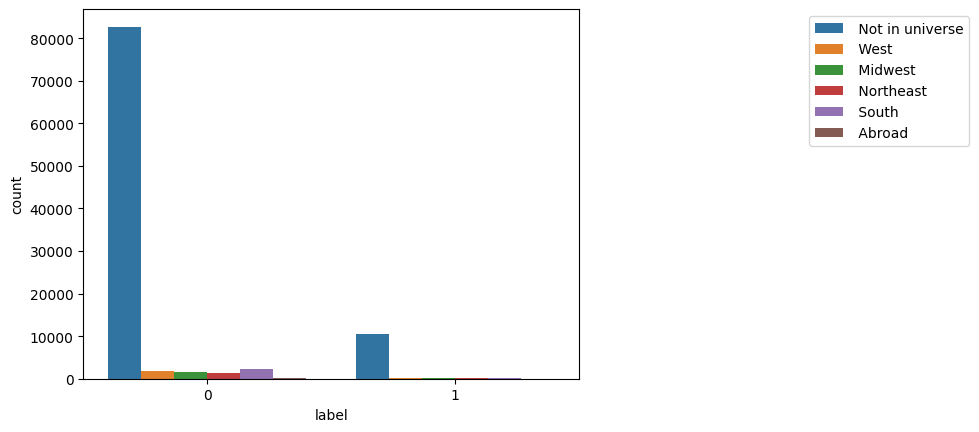

In [ ]:
train['label'] = train['label'].astype('category')
sns.countplot(x = 'label', hue ='region_of_previous_residence', data = train)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))

#### detailed industry recode

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train.groupby('label')['detailed_industry_recode'].value_counts(ascending=False).to_frame()

detailed_industry_recode
label detailed_industry_recode                          
0     0                                            48029
      33                                            7817
      43                                            3492
      4                                             2590
      42                                            1946
      29                                            1778
      45                                            1699
      37                                            1693
      41                                            1669
      32                                            1484
      39                                            1355
      35                                            1342
      44                                            1229
      34                                            1072
      2                                             1014
      38                                             711
      40                                             710
      11                                             686
      50                                             667
      47                                             628
      19                                             622
      24                                             612
      12                                             494
      36                                             459
      22                                             457
      31                                             443
      9                                              432
      30                                             431
      25                                             389
      1                                              373
      13                                             329
      27                                             279
      48                                             272
      21                                             254
      6                                              250
      5                                              248
      49                                             241
      18                                             228
      8                                              225
      23                                             220
      3                                              207
      16                                             199
      7                                              191
      15                                             163
      14                                             108
      46                                              79
      17                                              65
      28                                              63
      26                                              33
      51                                              12
      20                                               7
      10                                               3
1     45                                             956
      0                                              827
      43                                             808
      33                                             726
      35                                             534
      42                                             534
      32                                             501
      4                                              476
      37                                             472
      34                                             458
      41                                             435
      29                                             430
      11                                             297
      47                                             275
      50                                             268
      25                                             260
      12                                  

<Figure size 1500x1000 with 0 Axes>

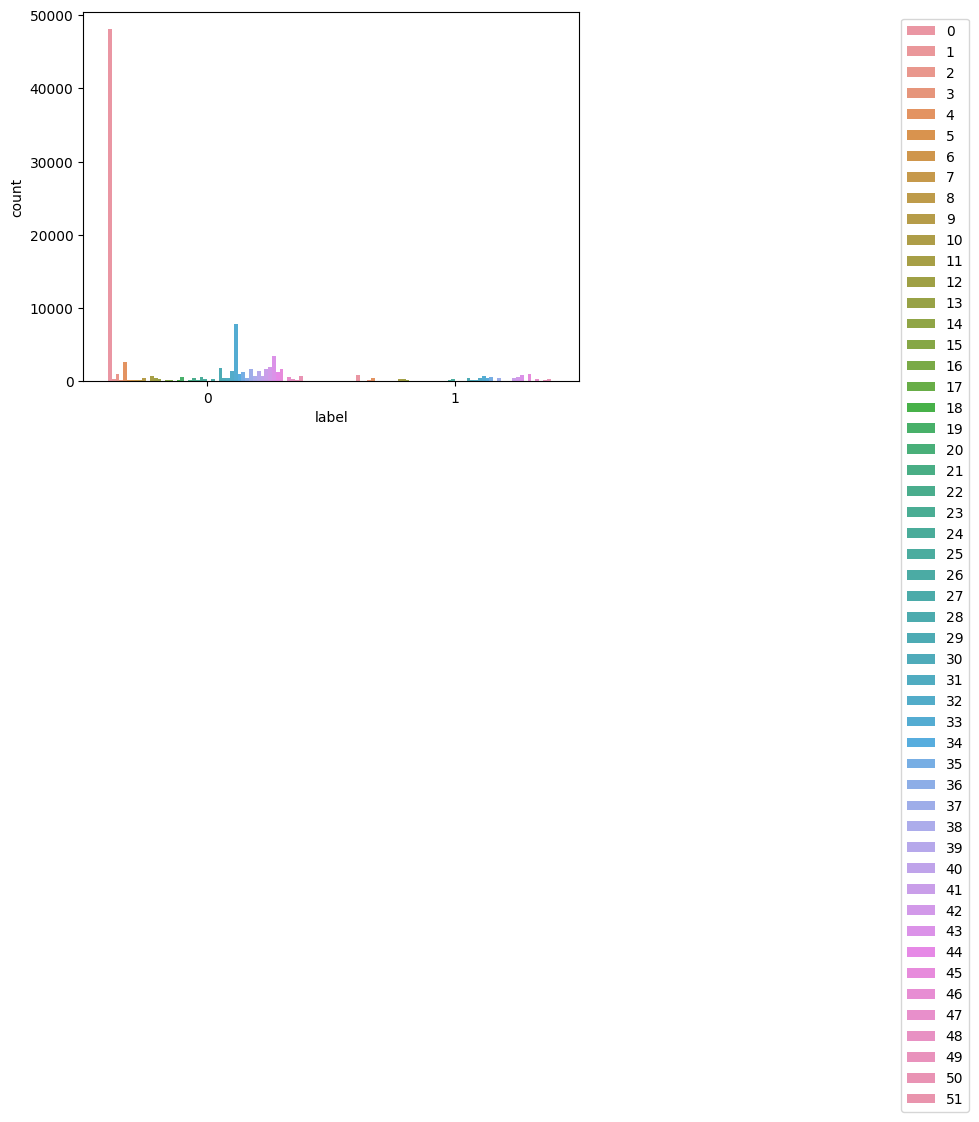

<Figure size 1500x1000 with 0 Axes>

In [ ]:
sns.countplot(x = 'label', hue = 'detailed_industry_recode', data = train)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1))
plt.figure(figsize=(15,10))

count_detailed_ind = train['detailed_industry_recode'].value_counts()


In [ ]:
def columnator_frequency(column):
    df_columnator = train
    #if column == 'major industry code': # condition only applied at 'major industry code' column to remove unwanted value.
        #mask_not_children = df_columnator['major industry code'] != 'Not in universe or children'
        #df_columnator = df_columnator[mask_not_children]
    plt.figure(figsize=(12, 8))
    sns.countplot(y=column, data=df_columnator, hue='label')
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel('Frequency')
    plt.show()

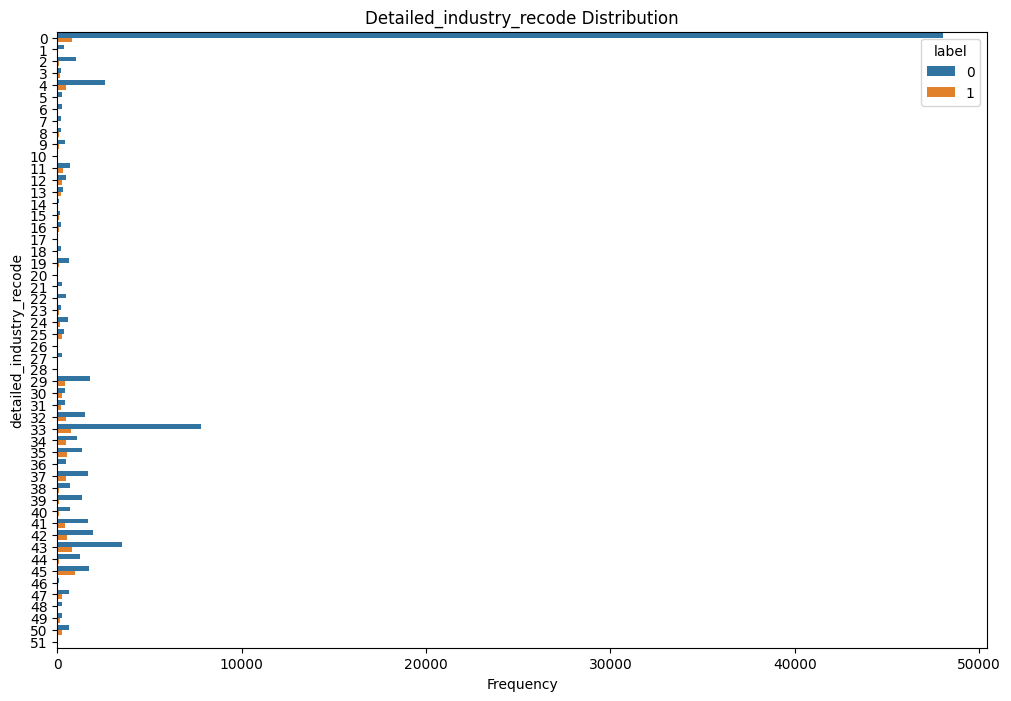

In [ ]:
columnator_frequency('detailed_industry_recode')

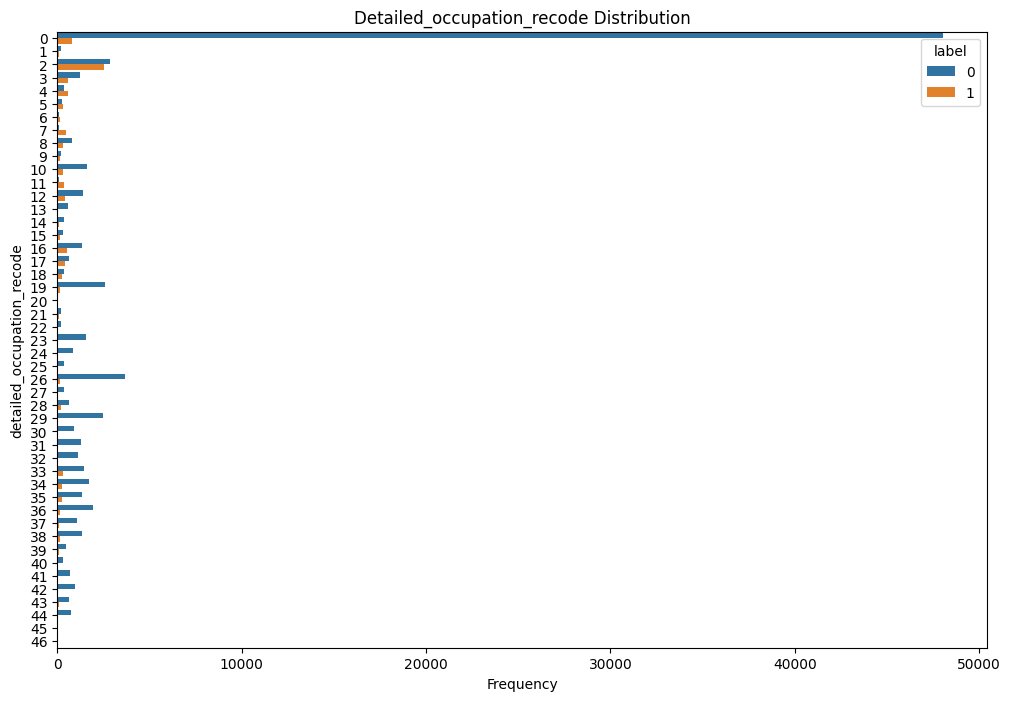

In [ ]:
columnator_frequency('detailed_occupation_recode')

<ipython-input-81-b5c052646650>:1: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



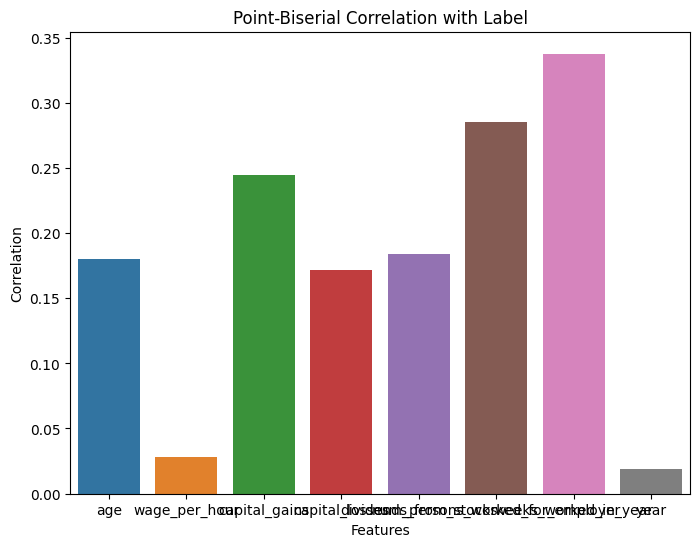

In [ ]:
correlations = train.corrwith(train['label'])

# Plot the correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Point-Biserial Correlation with Label')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
label_1 = train[train['label'] == 1]['capital_losses']
label_0 =  train[train['label'] == 0]['capital_losses']

fig = make_subplots()

# Add traces
fig.add_trace(
    go.Histogram(x = label_1,name = "1",opacity = 0.5, nbinsx=40)
)

fig.add_trace(
    go.Histogram(x = label_0,name = "0",opacity = 0.5, nbinsx=40)
)

# Add figure title
fig.update_layout(
    title_text="-]"
)

# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes(title_text="Frequency", secondary_y=False)

fig.show()

In [ ]:
label_1 = train[train['label'] == 1]['detailed_industry_recode']
label_0 =  train[train['label'] == 0]['detailed_industry_recode']

fig = make_subplots()

# Add traces
fig.add_trace(
    go.Histogram(x = label_1,name = "1",opacity = 0.5, nbinsx=40)
)

fig.add_trace(
    go.Histogram(x = label_0,name = "0",opacity = 0.5, nbinsx=40)
)

# Add figure title
fig.update_layout(
    title_text="-]"
)

# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes(title_text="Frequency", secondary_y=False)

fig.show()

In [ ]:
label_1 = train[train['label'] == 1]['detailed_occupation_recode']
label_0 =  train[train['label'] == 0]['detailed_occupation_recode']

fig = make_subplots()

# Add traces
fig.add_trace(
    go.Histogram(x = label_1,name = "1",opacity = 0.5, nbinsx=52)
)

fig.add_trace(
    go.Histogram(x = label_0,name = "0",opacity = 0.5, nbinsx=52)
)

# Add figure title
fig.update_layout(
    title_text="-]"
)

# Set x-axis title
fig.update_xaxes(title_text="")

# Set y-axes titles
fig.update_yaxes(title_text="Frequency", secondary_y=False)

fig.show()